# Import all necessary libraries

In [1]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import numpy as np

#1. Download and Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Split Dataset to Training Data, Validation Data and Testing Data


In [3]:
splitfolders.ratio('/content/drive/MyDrive/nalayathiran/flowers', output="/content/drive/MyDrive/nalayathiran/flowers_split", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 4317 files [01:37, 44.32 files/s] 


#2. Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
xtrain=train_datagen.flow_from_directory('/content/drive/MyDrive/nalayathiran/flowers_split/train',
                                         target_size=(64,64),
                                         class_mode='categorical', batch_size=100)

Found 3452 images belonging to 5 classes.


In [8]:
xtest=train_datagen.flow_from_directory('/content/drive/MyDrive/nalayathiran/flowers_split/val',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                        batch_size=100)

Found 430 images belonging to 5 classes.


#3. Create Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

#4. Add Layers(Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)


In [40]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer
model.add(Flatten()) # Flatten Layer
model.add(Dense(300,activation='relu')) # Dense Layer 1 with 300 neurons
model.add(Dense(150,activation='relu')) # Dense Layer 2 with 150 neurons
model.add(Dense(5,activation='softmax')) # Output Layer with 5 neurons

#5. Compile The Model

In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 30752)             0         
                                                                 
 dense_15 (Dense)            (None, 300)               9225900   
                                                                 
 dense_16 (Dense)            (None, 150)               45150     
                                                                 
 dense_17 (Dense)            (None, 5)                 755       
                                                      

# 6. Fit The Model

In [44]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=100,validation_data=xtest,validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
35/35 [==============================] - 16s 462ms/step - loss: 0.9243 - accuracy: 0.6443 - val_loss: 0.9651 - val_accuracy: 0.6372
Epoch 2/100
35/35 [==============================] - 17s 486ms/step - loss: 0.8995 - accuracy: 0.6521 - val_loss: 0.9833 - val_accuracy: 0.6209
Epoch 3/100
35/35 [==============================] - 18s 506ms/step - loss: 0.8339 - accuracy: 0.6857 - val_loss: 0.9057 - val_accuracy: 0.6581
Epoch 4/100
35/35 [==============================] - 16s 462ms/step - loss: 0.7864 - accuracy: 0.6979 - val_loss: 0.9385 - val_accuracy: 0.6628
Epoch 5/100
35/35 [==============================] - 18s 504ms/step - loss: 0.7368 - accuracy: 0.7167 - val_loss: 0.8831 - val_accuracy: 0.6953
Epoch 6/100
35/35 [==============================] - 17s 483ms/step - loss: 0.7570 - accuracy: 0.7065 - val_loss: 0.9147 - val_accuracy: 0.6721
Epoch 7/100
35/35 [==============================] - 16s 468ms/step - loss: 0.6869 - accuracy: 0.7416 - val_loss: 0.8786 - val_accuracy:

# 7. Save The Model

In [45]:
# Model was trained with accuracy of 98%
model.save('/content/drive/MyDrive/nalayathiran/Flowers.h5')

# 8. Test The Model

In [46]:
from tensorflow.keras.preprocessing import image

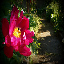

In [58]:
# Loading the Test Image
img=image.load_img('/content/drive/MyDrive/nalayathiran/flowers_split/test/rose/18486124712_17ebe7559b_n.jpg',target_size=(64,64))
img # Image belonging to the class label Rose

In [59]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0) # Adding extra dimension to image as it is in RGB
model.predict(x)

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [60]:
op=['Daisy','Dandelion','Rose','Sunflower','Tulip']
pred=np.argmax(model.predict(x)) 
# Predicting the output
op[pred]

'Rose'